## Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.externals.six import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
!pip install heamy
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")



/home/denis/ml/env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### 1. Выбор набора данных для решения задачи регресии.

In [2]:
data = pd.read_csv('winequality_red.csv', sep=',')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape 

(1599, 12)

In [4]:
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.dtypes 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 2. Удаление и заполнение пропусков и кодирование категориальных признаков.

In [ ]:
не требуется

In [6]:
columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]


In [7]:
x_array = data[columns].values
y_array = data['quality'].values 

### 3. Разделение с использованием метода train_test_split  выборки на обучающую и тестовую.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array,
test_size=0.26, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1183, 11), (416, 11), (1183,), (416,))

### 4. Обучение двух ансамблевых моделей. Оценка качества моделей с помощью одной из подходящих для задачи метрик. Сравнение качества полученных моделей.
#### 4.1. Стекинг 

In [9]:
# Качество отдельных моделей
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))

In [10]:
# Точность на отдельных моделях
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
MAE=0.49101002617400435

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MAE=0.4375

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm

In [11]:
# набор данных
dataset = Dataset(X_train, y_train, X_test)

# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')


In [12]:
# Эксперимент 1.1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [0.522252793480984, 0.5204325381349485, 0.5636614213669765, 0.46232452280050346, 0.5095639678321267, 0.47341851907557003, 0.47793217695331974, 0.4302567324465604, 0.44071610383028553, 0.490593330852405]
Mean accuracy: 0.48911521067736796
Standard Deviation: 0.03866824247419317
Variance: 0.0014952329760429968


In [13]:
# Эксперимент 1.2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [0.5707563025210081, 0.6463025210084034, 0.5816806722689075, 0.4994915254237287, 0.5965254237288136, 0.5164406779661016, 0.5109322033898305, 0.4971186440677967, 0.5591525423728813, 0.5658474576271187]
Mean accuracy: 0.554424797037459
Standard Deviation: 0.045839357531465785
Variance: 0.002101246698897549


In [14]:
# Эксперимент 1.3
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: дерево

stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.6302521008403361, 0.6722689075630253, 0.6302521008403361, 0.5169491525423728, 0.6016949152542372, 0.5508474576271186, 0.5169491525423728, 0.559322033898305, 0.6101694915254238, 0.5847457627118644]
Mean accuracy: 0.5873451075345393
Standard Deviation: 0.048637691252086765
Variance: 0.0023656250103333176


In [15]:
# Эксперимент 2.1
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.45865438203965947, 0.4445274965685606, 0.499039095917168, 0.3923561183775206, 0.4185459953670375, 0.4210127246135441, 0.4157302194574986, 0.39534098846073323, 0.42439330689507, 0.4330883699772755]
Mean accuracy: 0.43026886976740675
Standard Deviation: 0.029787026607361666
Variance: 0.0008872669541076718


In [16]:

# Эксперимент 2.2
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.45074654652818813, 0.46753311845467915, 0.5358034661009041, 0.4051528809291358, 0.43157383637781804, 0.43084850724889817, 0.4664541324764089, 0.4440822758524653, 0.429267451416664, 0.43466419526295225]
Mean accuracy: 0.4496126410648114
Standard Deviation: 0.03370022638152573
Variance: 0.0011357052581660828


In [17]:
# Эксперимент 2.3
# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: дерево

stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.46167407970787533, 0.46985910827846994, 0.5337409555896951, 0.3825162466117747, 0.4518668829348632, 0.43931395678653906, 0.4561837095735401, 0.44375448617197055, 0.4135503210764269, 0.45238935126023855]
Mean accuracy: 0.45048490979913935
Standard Deviation: 0.03691088068516074
Variance: 0.001362413112954172


In [18]:
# Эксперимент 3.1
# Первый уровень - две модели: линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_lr, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.4604987665780731, 0.45081151387749263, 0.5003513472623877, 0.39664289388098994, 0.4211657193184927, 0.4222075852621292, 0.42170202734101114, 0.39534310172861736, 0.42218118313953923, 0.4376346682371013]
Mean accuracy: 0.43285388066258346
Standard Deviation: 0.02978590499111804
Variance: 0.0008872001361399106


In [19]:
# Эксперимент 3.2
# Первый уровень - две модели:  линейная регрессия и случайный лес
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.4476470588235295, 0.4726050420168067, 0.500924369747899, 0.4836440677966102, 0.4800847457627118, 0.42601694915254246, 0.43245762711864405, 0.46915254237288123, 0.4519491525423729, 0.4773728813559322]
Mean accuracy: 0.464185443668993
Standard Deviation: 0.022665784960144413
Variance: 0.0005137378078595087


In [20]:
# Эксперимент 3.3
# Первый уровень - две модели: линейная регрессия и случайный лес
# Второй уровень: дерево

stacker = Regressor(dataset=stack_ds, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.5042016806722689, 0.5294117647058824, 0.5546218487394958, 0.5169491525423728, 0.559322033898305, 0.4576271186440678, 0.4830508474576271, 0.6186440677966102, 0.5254237288135594, 0.559322033898305]
Mean accuracy: 0.5308574277168494
Standard Deviation: 0.04298306732922732
Variance: 0.0018475440770288891


In [21]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.4608321413503237, 0.45063899033624283, 0.5007853192710473, 0.396757702659696, 0.42178476048478747, 0.42220932678786066, 0.4217004604267666, 0.39533382715927784, 0.4221540327193157, 0.43850134434102656]
Mean accuracy: 0.4330697905536344
Standard Deviation: 0.029884121507574437
Variance: 0.0008930607182794731


In [22]:
# Эксперимент 5
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: дерево
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.4388235294117647, 0.49529411764705883, 0.47840336134453776, 0.4473728813559321, 0.44966101694915245, 0.40203389830508474, 0.43254237288135583, 0.457457627118644, 0.4461016949152542, 0.4489830508474576]
Mean accuracy: 0.4496673550776243
Standard Deviation: 0.023804399774227755
Variance: 0.0005666494486112544


In [23]:
# Эксперимент 6
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
stacker = Regressor(dataset=stack_ds3, estimator=DecisionTreeRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.47058823529411764, 0.5882352941176471, 0.5966386554621849, 0.559322033898305, 0.5084745762711864, 0.4491525423728814, 0.4830508474576271, 0.5677966101694916, 0.5508474576271186, 0.5423728813559322]
Mean accuracy: 0.5316479134026492
Standard Deviation: 0.048388645127900115
Variance: 0.0023414609773138514


In [38]:
# Результаты
array_labels = ['LR','TREE', 'RF', 
                'TREE+LR=>LR',  'TREE+LR=>RF','TREE+LR=>TREE',
                 'TREE+RF=>LR', 'TREE+RF=>RF','TREE+RF=>TREE',
                'LR+RF=>LR', 'LR+RF=>RF','LR+RF=>TREE',
               
                'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF', 'TREE+LR+RF=>TREE']
array_mae = [0.4910, 0.4375, 0.4193,0.4891, 0.5544, 0.5873, 0.4302, 0.4496, 0.4504, 0.4328, 0.4641, 0.5308, 0.4330, 0.4496, 0.5316
            ]

In [39]:
min(array_mae)

0.433

In [31]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

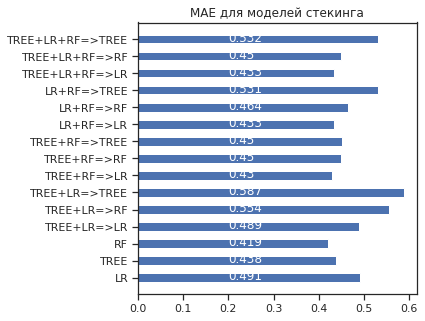

In [32]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')


Выведем лучшие модели

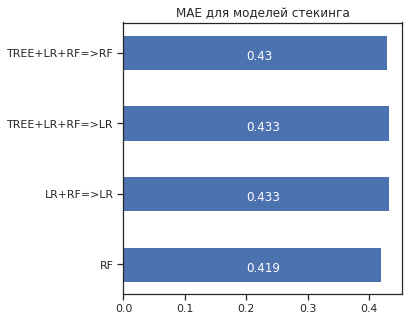

In [40]:
# Результаты
array_labels = [ 'RF', 
                'LR+RF=>LR', 
                'TREE+LR+RF=>LR', 
                'TREE+LR+RF=>RF' ]
array_mae = [ 0.4193,
            0.4328, 
            0.433, 
             0.4302]

# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')


Видим, что лучшие результаты стекинга похожи на самую сильную модель 1 уровня - случайный лес.  Лучшие модели получились, если на втором уровне в большинстве случаев использовалась линейная регрессия, а на 1 применялся случайный лес.

#### 4.2. Метод группового учета аргументов

In [41]:
# !pip install gmdhpy
from gmdhpy import gmdh

In [42]:
model = gmdh.MultilayerGMDH()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 0.21 sec
train layer1 in 0.88 sec
train layer2 in 0.89 sec
train layer3 in 0.88 sec
train layer4 in 0.90 sec
train layer5 in 0.90 sec
train layer6 in 0.89 sec
train layer7 in 0.88 sec
train layer8 in 0.88 sec
MAE=0.49275142270917777


In [43]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 'cubic', 'linear'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 1.10 sec
train layer1 in 4.62 sec
train layer2 in 4.72 sec
train layer3 in 4.60 sec
train layer4 in 4.55 sec
train layer5 in 4.54 sec
train layer6 in 4.50 sec
train layer7 in 4.56 sec
MAE=0.48557106923504756


### 5. Подбор значений одного гиперпараметра для моделей. 
#### 5.1. Стекинг 

In [44]:
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [45]:
params = {
'min_impurity_split': [ 0, 0.5,1,1.5,2, 3]
}

In [46]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, y_array)
grid_1.estimator.get_params().keys()


CPU times: user 146 ms, sys: 68.5 ms, total: 214 ms
Wall time: 1.25 s


/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [47]:
grid_1.best_params_

{'min_impurity_split': 0}

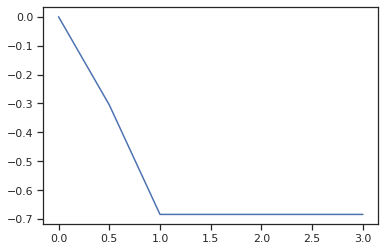

In [48]:
plt.plot(params['min_impurity_split'], grid_1.cv_results_["mean_test_score"]);

#### 5.2 Метод  группового учета аргументов

In [49]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),
                               n_jobs=2
                               )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 0.68 sec
train layer1 in 2.70 sec
train layer2 in 2.61 sec
train layer3 in 2.60 sec
train layer4 in 2.56 sec
train layer5 in 2.58 sec
train layer6 in 2.58 sec
train layer7 in 2.57 sec
MAE=0.48557106923504756


In [50]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),
                               criterion_minimum_width=5
                               )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 1.14 sec
train layer1 in 4.69 sec
train layer2 in 4.65 sec
train layer3 in 4.61 sec
train layer4 in 4.59 sec
train layer5 in 4.57 sec
train layer6 in 4.09 sec
train layer7 in 4.10 sec
MAE=0.48557106923504756


In [51]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov'),
                           max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 0.21 sec
train layer1 in 0.95 sec
train layer2 in 0.91 sec
train layer3 in 0.88 sec
MAE=0.5001011616867227


In [52]:
model = gmdh.MultilayerGMDH(ref_functions=('quadratic'),
                           max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 0.29 sec
train layer1 in 1.20 sec
train layer2 in 1.23 sec
train layer3 in 1.20 sec
MAE=0.4983202723714023


In [53]:
model = gmdh.MultilayerGMDH(ref_functions=('cubic'),
                           max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 0.46 sec
train layer1 in 1.97 sec
train layer2 in 1.95 sec
train layer3 in 1.94 sec
MAE=0.4909035647486556


In [54]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),                           
                            max_layer_count=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 1.12 sec
train layer1 in 4.70 sec
train layer2 in 4.65 sec
train layer3 in 4.62 sec
MAE=0.48724853306639215


In [55]:
params = {
    'ref_functions': ['linear_cov', 'quadratic', 'cubic', 'linear']
    
}

In [56]:
for param in params['ref_functions']:
    model = gmdh.MultilayerGMDH(ref_functions=(param),                           
                            max_layer_count=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print('Param value: {}, MAE={}'.format(param, result))
    print()

train layer0 in 0.21 sec
train layer1 in 0.88 sec
train layer2 in 0.93 sec
Param value: linear_cov, MAE=0.5005100535726884

train layer0 in 0.28 sec
train layer1 in 1.19 sec
train layer2 in 1.20 sec
Param value: quadratic, MAE=0.4996399148742637

train layer0 in 0.47 sec
train layer1 in 1.95 sec
train layer2 in 1.93 sec
Param value: cubic, MAE=0.48785162393161924

train layer0 in 0.17 sec
train layer1 in 0.75 sec
train layer2 in 0.74 sec
Param value: linear, MAE=0.4989142429592759



cubic лучше всех снизила ошибку.

In [61]:
params = {
    'max_layer_count': [1,2,3,4,6,8, 10],
    
}

In [62]:
for param in params['max_layer_count']:
    model = gmdh.MultilayerGMDH(ref_functions=('cubic'),                           
                            max_layer_count=param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print('Param value: {}, MAE={}'.format(param, result))


train layer0 in 0.47 sec
Param value: 1, MAE=0.5059479855052901
train layer0 in 0.47 sec
train layer1 in 1.99 sec
Param value: 2, MAE=0.4981671446671235
train layer0 in 0.47 sec
train layer1 in 1.96 sec
train layer2 in 1.99 sec
Param value: 3, MAE=0.48785162393161924
train layer0 in 0.48 sec
train layer1 in 1.95 sec
train layer2 in 1.96 sec
train layer3 in 1.95 sec
Param value: 4, MAE=0.4909035647486556
train layer0 in 0.47 sec
train layer1 in 1.96 sec
train layer2 in 1.95 sec
train layer3 in 1.95 sec
train layer4 in 1.96 sec
train layer5 in 1.96 sec
Param value: 6, MAE=0.48579216879768594
train layer0 in 0.46 sec
train layer1 in 1.94 sec
train layer2 in 1.94 sec
train layer3 in 2.13 sec
train layer4 in 2.10 sec
train layer5 in 2.04 sec
train layer6 in 2.04 sec
Param value: 8, MAE=0.48558638121852565
train layer0 in 0.46 sec
train layer1 in 1.96 sec
train layer2 in 2.03 sec
train layer3 in 2.09 sec
train layer4 in 2.04 sec
train layer5 in 1.98 sec
train layer6 in 1.97 sec
Param value: 

### 6. Повтор пункта 4 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством моделей, полученных в пункте 4

In [63]:

model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'min_impurity_split':1.5},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)

stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.4579882552127175, 0.4377693833774365, 0.48922667553576704, 0.38921760926414134, 0.4283664559536715, 0.4191313998228922, 0.41212175657224587, 0.39823953008713964, 0.42078538893042594, 0.42961054068482674]
Mean accuracy: 0.42824569954412645
Standard Deviation: 0.027419240042358663
Variance: 0.0007518147245004847


/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/home/denis/ml/env/lib/python3.6/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_

Результат немного улучшился

#### Метод группового учета аргументов

In [64]:
model = gmdh.MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 
                                               'cubic', 'linear'),                           
                            max_layer_count=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
result = mean_absolute_error(y_test, y_pred)
print('MAE={}'.format(result))

train layer0 in 1.13 sec
train layer1 in 4.58 sec
train layer2 in 4.57 sec
train layer3 in 4.56 sec
train layer4 in 4.53 sec
train layer5 in 4.54 sec
MAE=0.48498913574135594


Результат удалось немного улучшить.

### Вывод:
- В процессе выполнения данной лабораторной работы было определено, что наилучшим образом себя показывает ансамблевая модель, где на первом уровне находятся модели случайный лес и дерево решений, а на втором- линейная регрессия. Применение линейной регрессии на первом уровне ансамблевых моделей показало себя хуже всего. Было выяснено, что модель случайный лес по точности соспоставима с лучшими ансамблевыми моделями.
- Метод группового учета оказался хуже по точности, чем ансамблевые модели.